In [1]:
import sys
from os.path import join, dirname, realpath
current_dir = dirname(realpath('__file__'))
sys.path.insert(0, dirname(current_dir))
import os
import imp
import logging
import random
import timeit
import datetime
import numpy as np
import tensorflow as tf
from utils.logs import set_logging, DebugFolder
from config_path import PROSTATE_LOG_PATH, POSTATE_PARAMS_PATH
from pipeline.train_validate import TrainValidatePipeline
from pipeline.one_split import OneSplitPipeline
from pipeline.crossvalidation_pipeline import CrossvalidationPipeline
from pipeline.LeaveOneOut_pipeline import LeaveOneOutPipeline

Using TensorFlow backend.


In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

random_seed = 234
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_random_seed(random_seed)

timeStamp = '_{0:%b}-{0:%d}_{0:%H}-{0:%M}'.format(datetime.datetime.now())

In [3]:
def elapsed_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

params_file_list = []

# pnet
params_file_list.append('./pnet/onsplit_average_reg_10_tanh_large_testing')
# params_file_list.append('./pnet/onsplit_average_reg_10_tanh_large_testing_inner')
# params_file_list.append('./pnet/crossvalidation_average_reg_10_tanh')
#
# # other ML models
# params_file_list.append('./compare/onsplit_ML_test')
# params_file_list.append('./compare/crossvalidation_ML_test')
#
# # dense
# params_file_list.append('./dense/onesplit_number_samples_dense_sameweights')
# params_file_list.append('./dense/onsplit_dense')
#
# # number_samples
# params_file_list.append('./number_samples/crossvalidation_average_reg_10')
## params_file_list.append('./number_samples/crossvalidation_average_reg_10_tanh')
# params_file_list.append('./number_samples/crossvalidation_number_samples_dense_sameweights')
#
# # external_validation
# params_file_list.append('./external_validation/pnet_validation')
#
# #reviews------------------------------------
# #LOOCV
# params_file_list.append('./review/LOOCV_reg_10_tanh')
# #ge
# params_file_list.append('./review/onsplit_average_reg_10_tanh_large_testing_ge')
# #fusion
# params_file_list.append('./review/fusion/onsplit_average_reg_10_tanh_large_testing_TMB')
# params_file_list.append('./review/fusion/onsplit_average_reg_10_tanh_large_testing_fusion')
# params_file_list.append('./review/fusion/onsplit_average_reg_10_tanh_large_testing_fusion_zero')
# params_file_list.append('./review/fusion/onsplit_average_reg_10_tanh_large_testing_inner_fusion_genes')
#
# #single copy
# params_file_list.append('./review/9single_copy/onsplit_average_reg_10_tanh_large_testing_single_copy')
# params_file_list.append('./review/9single_copy/crossvalidation_average_reg_10_tanh_single_copy')
#
# #custom arch
# params_file_list.append('./review/10custom_arch/onsplit_kegg')
#
# #learning rate
# params_file_list.append('./review/learning_rate/onsplit_average_reg_10_tanh_large_testing_inner_LR')

# hotspot
# params_file_list.append('./review/9hotspot/onsplit_average_reg_10_tanh_large_testing_hotspot')
# params_file_list.append('./review/9hotspot/onsplit_average_reg_10_tanh_large_testing_count')

# cancer genes
# params_file_list.append('./review/onsplit_average_reg_10_tanh_large_testing')
# params_file_list.append('./review/onsplit_average_reg_10_cancer_genes_testing')
# params_file_list.append('./review/crossvalidation_average_reg_10_tanh_cancer_genes')

# review 2 (second iteration of reviews)
# params_file_list.append('./review/cnv_burden_training/onsplit_average_reg_10_tanh_large_testing_TMB2')
# params_file_list.append('./review/cnv_burden_training/onsplit_average_reg_10_tanh_large_testing_account_zero2')
# params_file_list.append('./review/cnv_burden_training/onsplit_average_reg_10_tanh_large_testing_TMB_cnv')
# params_file_list.append('./review/cnv_burden_training/onsplit_average_reg_10_tanh_large_testing_cnv_burden2')

setting logs
random seed 234
/Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/train/params/P1000/./pnet/onsplit_average_reg_10_tanh_large_testing.py
{'params': {'save_train': True, 'eval_dataset': 'test'}, 'type': 'one_split'}
[{'params': {'drop_AR': False, 'balanced_data': False, 'data_type': ['mut_important', 'cnv_del', 'cnv_amp'], 'mut_binary': True, 'cnv_levels': 3, 'combine_type': 'union', 'training_split': 0, 'selected_genes': 'tcga_prostate_expressed_genes_and_cancer_genes.csv', 'use_coding_genes_only': True}, 'type': 'prostate_paper', 'id': 'ALL'}]
data_params {'params': {'drop_AR': False, 'balanced_data': False, 'data_type': ['mut_important', 'cnv_del', 'cnv_amp'], 'mut_binary': True, 'cnv_levels': 3, 'combine_type': 'union', 'training_split': 0, 'selected_genes': 'tcga_prostate_expressed_genes_and_cancer_genes.csv', 'use_coding_genes_only': True}, 'type': 'prostate_paper', 'id': 'ALL'}
loading data....
loading mut_important
loading data from /Users

/Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/train/params/P1000/./pnet/onsplit_average_reg_10_tanh_large_testing.py:1: RuntimeWarning: Parent module '/Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/train/params/P1000/' not found while handling absolute import
  from model.builders.prostate_models import build_pnet2


(1011, 14378)
loading response from response_paper.csv
some genes dont exist in the original data set
loaded data 1011 samples, 8319 variables, 1011 responses 
8319
mut_binary = True
loading cnv_del
loading data from /Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/_database/prostate/processed/P1000_data_CNA_paper.csv,
(1013, 13802)
loading from memory cached_data
some genes dont exist in the original data set
loaded data 1013 samples, 6344 variables, 1013 responses 
6344
loading cnv_amp
loading data from /Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/_database/prostate/processed/P1000_data_CNA_paper.csv,
loading from memory cached_data
(1013, 13802)
loading from memory cached_data
some genes dont exist in the original data set
loaded data 1013 samples, 6344 variables, 1013 responses 
6344
After combining, loaded data 1011 samples, 27687 variables, 1011 responses 
predicting
x_train (807, 27687) y_train (807, 1) 
x_test (204, 27

model/builders/builders_utils.py:155: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear0")`
  decision_outcome = Dense(1, activation='linear', name='o_linear{}'.format(0), W_regularizer=reg_l(w_reg_outcome0))(
model/builders/builders_utils.py:172: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear1")`
  W_regularizer=reg_l(w_reg_outcome1 / 2.))(outcome)


layer # 0
pathways 1387
genes 9275
filtered_map (9229, 0)
filtered_map (9229, 0)
filtered_map (9229, 0)
layer 0 , # of edges  15651.0
layer # 1
pathways 1066
genes 1399
filtered_map (1387, 0)
filtered_map (1387, 0)
filtered_map (1387, 0)
layer 1 , # of edges  1396.0
layer # 2
pathways 447
genes 1068
filtered_map (1066, 0)
filtered_map (1066, 0)
filtered_map (1066, 0)
layer 2 , # of edges  1070.0
layer # 3
pathways 147
genes 448
filtered_map (447, 0)
filtered_map (447, 0)
filtered_map (447, 0)
layer 3 , # of edges  447.0
layer # 4
pathways 26
genes 147
filtered_map (147, 0)
filtered_map (147, 0)
filtered_map (147, 0)
layer 4 , # of edges  148.0
layer # 5
pathways 1
genes 26
filtered_map (26, 0)
filtered_map (26, 0)
filtered_map (26, 0)
layer 5 , # of edges  26.0
original dropout [0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
dropout [1, 2, 3, 4, 5] [0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
n_genes, n_pathways 9229 1387 
layer 0, dropout  0.1 w_reg 0.001


model/builders/builders_utils.py:238: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear2")`
  W_regularizer=reg_l(w_reg_outcome))(outcome)


layer 1, dropout  0.1 w_reg 0.001
n_genes, n_pathways 1066 447 


model/builders/builders_utils.py:238: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear3")`
  W_regularizer=reg_l(w_reg_outcome))(outcome)


layer 2, dropout  0.1 w_reg 0.001


model/builders/builders_utils.py:238: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear4")`
  W_regularizer=reg_l(w_reg_outcome))(outcome)


n_genes, n_pathways 447 147 
layer 3, dropout  0.1 w_reg 0.001
n_genes, n_pathways 147 26 


model/builders/builders_utils.py:238: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear5")`
  W_regularizer=reg_l(w_reg_outcome))(outcome)


layer 4, dropout  0.1 w_reg 0.001


model/builders/builders_utils.py:238: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_regularizer=<keras.reg..., name="o_linear6")`
  W_regularizer=reg_l(w_reg_outcome))(outcome)
model/builders/prostate_models.py:171: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  model = Model(input=[ins], output=outcome)


Compiling...
loss_weights [2, 7, 20, 54, 148, 400]
done compiling
  - 0 inputs (None, 27687)
  - 1 h0 (None, 9229)
  - 2 dropout_0 (None, 9229)
  - 3 h1 (None, 1387)
  - 4 dropout_1 (None, 1387)
  - 5 h2 (None, 1066)
  - 6 dropout_2 (None, 1066)
  - 7 h3 (None, 447)
  - 8 dropout_3 (None, 447)
  - 9 h4 (None, 147)
  - 10 dropout_4 (None, 147)
  - 11 h5 (None, 26)
  - 12 o_linear1 (None, 1)
  - 13 o_linear2 (None, 1)
  - 14 o_linear3 (None, 1)
  - 15 o_linear4 (None, 1)
  - 16 o_linear5 (None, 1)
  - 17 o_linear6 (None, 1)
  - 18 o1 (None, 1)
  - 19 o2 (None, 1)
  - 20 o3 (None, 1)
  - 21 o4 (None, 1)
  - 22 o5 (None, 1)
  - 23 o6 (None, 1)
[<keras.engine.input_layer.InputLayer object at 0xb2d875ad0>, <model.layers_custom.Diagonal object at 0x1a31bcfc10>, <keras.layers.core.Dropout object at 0x1a32ed1a10>, <model.layers_custom.SparseTF object at 0x1a35c39b50>, <keras.layers.core.Dropout object at 0x1a31dbc810>, <model.layers_custom.SparseTF object at 0x1a31dbc650>, <keras.layers.core.Dr

Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
 - 12s - loss: 400.7784 - o1_loss: 0.6097 - o2_loss: 0.6330 - o3_loss: 0.6354 - o4_loss: 0.6352 - o5_loss: 0.6345 - o6_loss: 0.6345 - o1_f1: 0.0000e+00 - o2_f1: 0.0000e+00 - o3_f1: 0.0000e+00 - o4_f1: 0.0000e+00 - o5_f1: 0.0000e+00 - o6_f1: 0.0000e+00 - val_loss: 397.8032 - val_o1_loss: 0.6096 - val_o2_loss: 0.6269 - val_o3_loss: 0.6292 - val_o4_loss: 0.6295 - val_o5_loss: 0.6300 - val_o6_loss: 0.6299 - val_o1_f1: 0.0000e+00 - val_o2_f1: 0.0000e+00 - val_o3_f1: 0.0000e+00 - val_o4_f1: 0.0000e+00 - val_o5_f1: 0.0000e+00 - val_o6_f1: 0.0000e+00
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
 - 13s - loss: 400.6034 - o1_loss: 0.5994 - o2_loss: 0.6297 - o3_loss: 0.6336 - o4_loss: 0.6341 - o5_loss: 0.6346 - o6_loss: 0.6344 - o1_f1: 0.0398 - o2_f1: 0.0000e+00 - o3_f1: 0.0000e+00 - o4_f1: 0.0000e+00 - o5_f1: 0.0000e+00 - o6_f1: 0.0000e+00 - val_loss: 397.4982 - val_o1_loss: 0.6032 - 

Epoch 17/50

Epoch 00017: LearningRateScheduler setting learning rate to 0.001.
 - 13s - loss: 395.6370 - o1_loss: 0.4692 - o2_loss: 0.4758 - o3_loss: 0.5787 - o4_loss: 0.6207 - o5_loss: 0.6299 - o6_loss: 0.6314 - o1_f1: 0.4880 - o2_f1: 0.5263 - o3_f1: 0.0089 - o4_f1: 0.0000e+00 - o5_f1: 0.0000e+00 - o6_f1: 0.0000e+00 - val_loss: 392.2447 - val_o1_loss: 0.5118 - val_o2_loss: 0.4762 - val_o3_loss: 0.5670 - val_o4_loss: 0.6122 - val_o5_loss: 0.6242 - val_o6_loss: 0.6264 - val_o1_f1: 0.5252 - val_o2_f1: 0.5716 - val_o3_f1: 0.0000e+00 - val_o4_f1: 0.0000e+00 - val_o5_f1: 0.0000e+00 - val_o6_f1: 0.0000e+00
Epoch 18/50

Epoch 00018: LearningRateScheduler setting learning rate to 0.001.
 - 12s - loss: 394.3110 - o1_loss: 0.4630 - o2_loss: 0.4604 - o3_loss: 0.5610 - o4_loss: 0.6140 - o5_loss: 0.6281 - o6_loss: 0.6307 - o1_f1: 0.5916 - o2_f1: 0.6316 - o3_f1: 0.1099 - o4_f1: 0.0000e+00 - o5_f1: 0.0000e+00 - o6_f1: 0.0000e+00 - val_loss: 390.0699 - val_o1_loss: 0.5035 - val_o2_loss: 0.4605 - val_

Epoch 31/50

Epoch 00031: LearningRateScheduler setting learning rate to 0.001.
 - 10s - loss: 243.2628 - o1_loss: 0.3596 - o2_loss: 0.3055 - o3_loss: 0.3194 - o4_loss: 0.3357 - o5_loss: 0.3746 - o6_loss: 0.3980 - o1_f1: 0.7345 - o2_f1: 0.7663 - o3_f1: 0.7598 - o4_f1: 0.7501 - o5_f1: 0.7332 - o6_f1: 0.7237 - val_loss: 255.8298 - val_o1_loss: 0.4262 - val_o2_loss: 0.3428 - val_o3_loss: 0.3639 - val_o4_loss: 0.3688 - val_o5_loss: 0.3922 - val_o6_loss: 0.4151 - val_o1_f1: 0.5818 - val_o2_f1: 0.7181 - val_o3_f1: 0.6674 - val_o4_f1: 0.6674 - val_o5_f1: 0.6895 - val_o6_f1: 0.6983
Epoch 32/50

Epoch 00032: LearningRateScheduler setting learning rate to 0.001.
 - 12s - loss: 233.7147 - o1_loss: 0.3533 - o2_loss: 0.3023 - o3_loss: 0.3163 - o4_loss: 0.3297 - o5_loss: 0.3613 - o6_loss: 0.3800 - o1_f1: 0.7385 - o2_f1: 0.7939 - o3_f1: 0.7698 - o4_f1: 0.7664 - o5_f1: 0.7395 - o6_f1: 0.7507 - val_loss: 247.2892 - val_o1_loss: 0.4194 - val_o2_loss: 0.3319 - val_o3_loss: 0.3489 - val_o4_loss: 0.3575 - 

 - 11s - loss: 136.5482 - o1_loss: 0.2946 - o2_loss: 0.2065 - o3_loss: 0.2029 - o4_loss: 0.2026 - o5_loss: 0.2161 - o6_loss: 0.2142 - o1_f1: 0.8145 - o2_f1: 0.8606 - o3_f1: 0.8621 - o4_f1: 0.8646 - o5_f1: 0.8527 - o6_f1: 0.8601 - val_loss: 226.3915 - val_o1_loss: 0.3923 - val_o2_loss: 0.3178 - val_o3_loss: 0.3246 - val_o4_loss: 0.3362 - val_o5_loss: 0.3498 - val_o6_loss: 0.3627 - val_o1_f1: 0.6732 - val_o2_f1: 0.7043 - val_o3_f1: 0.7043 - val_o4_f1: 0.6883 - val_o5_f1: 0.6883 - val_o6_f1: 0.6739
Epoch 46/50

Epoch 00046: LearningRateScheduler setting learning rate to 0.001.
 - 10s - loss: 135.9990 - o1_loss: 0.2934 - o2_loss: 0.2053 - o3_loss: 0.2023 - o4_loss: 0.2023 - o5_loss: 0.2141 - o6_loss: 0.2135 - o1_f1: 0.8475 - o2_f1: 0.8871 - o3_f1: 0.8839 - o4_f1: 0.8947 - o5_f1: 0.8848 - o6_f1: 0.8822 - val_loss: 217.9886 - val_o1_loss: 0.3864 - val_o2_loss: 0.3100 - val_o3_loss: 0.3159 - val_o4_loss: 0.3246 - val_o5_loss: 0.3377 - val_o6_loss: 0.3482 - val_o1_f1: 0.6821 - val_o2_f1: 0.686

Tensor("inputs_1:0", shape=(?, 27687), dtype=float32) <type 'numpy.ndarray'> (1, 27687) float64
Tensor("inputs_1:0", shape=(?, 27687), dtype=float32) <type 'numpy.ndarray'> (807, 27687) float64
attributions (807, 27687)
gradients.shape (807, 27687)
feature_weights.shape (27687,)
feature_weights min max -2.2765362 42.22237
layer # 1, layer name h0,  output name -1
graph <tensorflow.python.framework.ops.Graph object at 0x1a31305750>
h0
input dimension 27687 self.units 9229
n_inputs_per_node 3
self.kernel_initializer None <keras.initializers.VarianceScaling object at 0x1a36028ed0> None
input dimensions (None, 27687)
h0
model.inputs [<tf.Tensor 'inputs_2:0' shape=(?, 27687) dtype=float32>]
model y Tensor("o6_2/Sigmoid:0", shape=(?, 1), dtype=float32)
model x Tensor("h0_2/Tanh:0", shape=(?, 9229), dtype=float32)
hello from deep explain
DeepExplain: running "deeplift" explanation method (5)
xss (807, 27687), xs (807, 27687)
h0_2/Tanh
h1_2/Tanh
h2_2/Tanh
h3_2/Tanh
h4_2/Tanh
h5_2/Tanh
o6_2/Sig

h5
model.inputs [<tf.Tensor 'inputs_7:0' shape=(?, 27687) dtype=float32>]
model y Tensor("o6_7/Sigmoid:0", shape=(?, 1), dtype=float32)
model x Tensor("h5_7/Tanh:0", shape=(?, 26), dtype=float32)
hello from deep explain
DeepExplain: running "deeplift" explanation method (5)
xss (807, 27687), xs (807, 27687)
h0_7/Tanh
h1_7/Tanh
h2_7/Tanh
h3_7/Tanh
h4_7/Tanh
h5_7/Tanh
o6_7/Sigmoid
ins [<tf.Tensor 'h0_7/BiasAdd:0' shape=(?, 9229) dtype=float32>, <tf.Tensor 'h1_7/BiasAdd:0' shape=(?, 1387) dtype=float32>, <tf.Tensor 'h2_7/BiasAdd:0' shape=(?, 1066) dtype=float32>, <tf.Tensor 'h3_7/BiasAdd:0' shape=(?, 447) dtype=float32>, <tf.Tensor 'h4_7/BiasAdd:0' shape=(?, 147) dtype=float32>, <tf.Tensor 'h5_7/BiasAdd:0' shape=(?, 26) dtype=float32>, <tf.Tensor 'o_linear6_7/BiasAdd:0' shape=(?, 1) dtype=float32>]
Tensor("inputs_7:0", shape=(?, 27687), dtype=float32) <type 'numpy.ndarray'> (1, 27687) float64
Tensor("inputs_7:0", shape=(?, 27687), dtype=float32) <type 'numpy.ndarray'> (1, 27687) float64
T

/opt/anaconda3/envs/pnet_env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/envs/pnet_env/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predicting
model id: Logistic Regression_ALL
predicitng ...
y_pred_test (204,) (204,)
(204, 1) (204,)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       137
           1       0.79      0.67      0.73        67

   micro avg       0.83      0.83      0.83       204
   macro avg       0.82      0.79      0.80       204
weighted avg       0.83      0.83      0.83       204

model name Logistic Regression_ALL -- Test score {'aupr': 0.8089833666704149, 'f1': 0.7258064516129032, 'auc': 0.881904346878745, 'recall': 0.6716417910447762, 'precision': 0.7894736842105263, 'accuracy': 0.8333333333333334}
saving results
saving yml : /Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/_logs/p1000/./pnet/onsplit_average_reg_10_tanh_large_testing/Logistic Regression_ALL_params.yml
saving results : /Users/Shouvik/Desktop/ECBME 4060 Genomics/Final Project/pnet_prostate_paper/_logs/p1000/./pnet/onsplit_average_reg_10_tanh_larg

<Figure size 720x432 with 0 Axes>

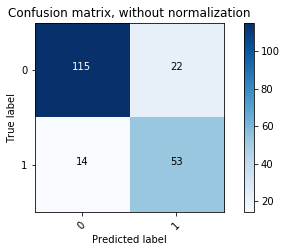

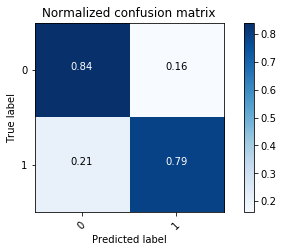

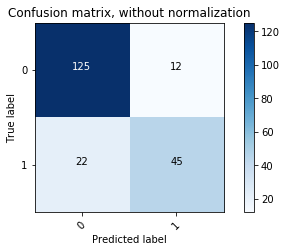

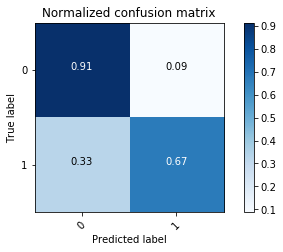

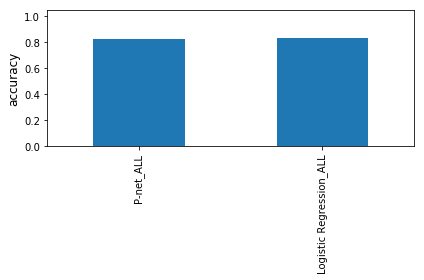

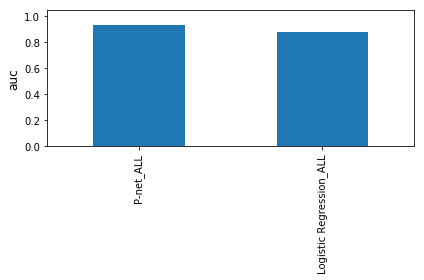

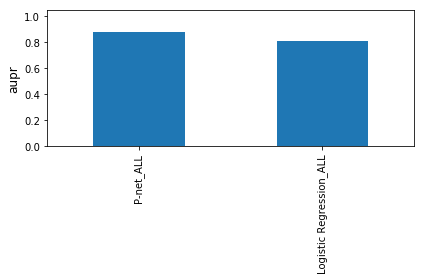

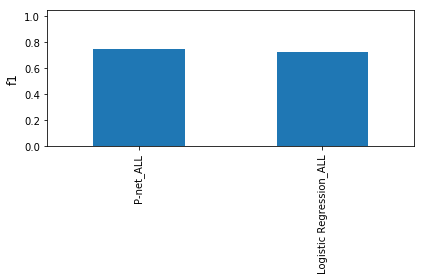

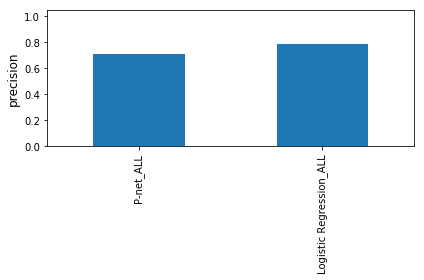

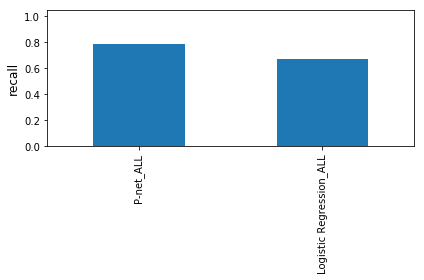

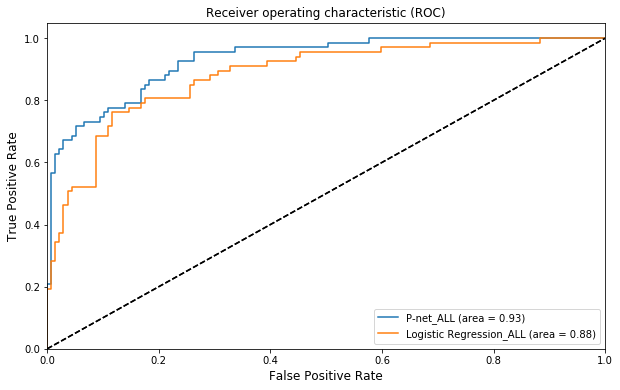

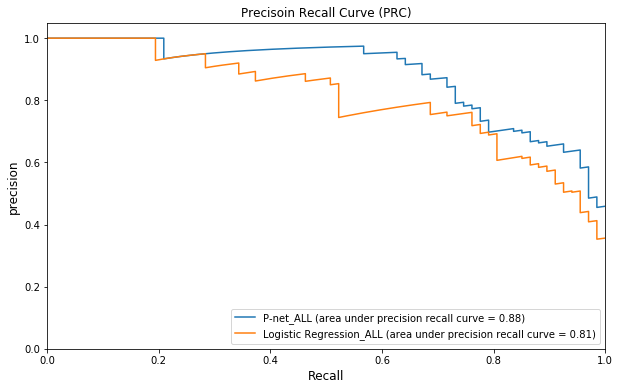

In [4]:
for params_file in params_file_list:
    log_dir = join(PROSTATE_LOG_PATH, params_file)
    log_dir = log_dir
    set_logging(log_dir)
    params_file = join(POSTATE_PARAMS_PATH, params_file)
    logging.info('random seed %d' % random_seed)
    params_file_full = params_file + '.py'
    print params_file_full
    params = imp.load_source(params_file, params_file_full)

    DebugFolder(log_dir)
    if params.pipeline['type'] == 'one_split':
        pipeline = OneSplitPipeline(task=params.task, data_params=params.data, model_params=params.models,
                                    pre_params=params.pre, feature_params=params.features,
                                    pipeline_params=params.pipeline,
                                    exp_name=log_dir)

    elif params.pipeline['type'] == 'crossvalidation':
        pipeline = CrossvalidationPipeline(task=params.task, data_params=params.data, feature_params=params.features,
                                           model_params=params.models, pre_params=params.pre,
                                           pipeline_params=params.pipeline, exp_name=log_dir)
    elif params.pipeline['type'] == 'Train_Validate':
        pipeline = TrainValidatePipeline(data_params=params.data, model_params=params.models, pre_params=params.pre,
                                         feature_params=params.features, pipeline_params=params.pipeline,
                                         exp_name=log_dir)

    elif params.pipeline['type'] == 'LOOCV':
        pipeline = LeaveOneOutPipeline(task=params.task, data_params=params.data, feature_params=params.features,
                                       model_params=params.models, pre_params=params.pre,
                                       pipeline_params=params.pipeline, exp_name=log_dir)
    start = timeit.default_timer()
    pipeline.run()
    stop = timeit.default_timer()
    mins, secs = elapsed_time(start, stop)
    logging.info('Elapsed Time: {}m {}s'.format(mins, secs))
